In [1]:
import pandas as pd
import numpy as np

#from IFD_tsne import *
from tsne_jax import *
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from utils import load_data, plot_heatmap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#import tikzplotlib

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(fontsizes.aistats2022())
plt.rcParams['axes.grid'] = False

### Load matrices generated in R

In [2]:
selected_data = pd.read_csv('datasets/AGEMAP/selected_data.txt')
selected_data = selected_data.values
labels = pd.read_csv('datasets/AGEMAP/labels.txt', header=None)
labels = labels.values.flatten().tolist()[1:]
key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)


I0000 00:00:1718196869.250387       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.16 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.6115, 50 iterations in 0.2983 sec
Iteration  100, KL divergence 1.5267, 50 iterations in 0.2898 sec
Iteration  150, KL divergence 1.4303, 50 iterations in 0.2893 sec
Iteration  200, KL divergence 1.4014, 50 iterations in 0.2892 sec
Iteration  250, KL divergence 1.3857, 50 iterations in 0.2910 sec
   --> Time elapsed: 1.46 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.5425, 50 iterations in 0.3045 sec
Iteration  100, KL divergence 0.4040, 50 iterations in 0.2878 sec
Iteration  150, KL divergence 0.3565, 50 iterations in 0.2870 sec
Iteration  200, KL divergence 0.3366, 50 iterations in 0.3142 sec
Iteration 

In [3]:
mean = pd.read_csv('datasets/AGEMAP/mean.txt')
cov1 = pd.read_csv('datasets/AGEMAP/cov1.txt')
N = np.array(cov1.values)
cov2 = pd.read_csv('datasets/AGEMAP/cov2.txt')
D = np.array(cov2.values)

print(mean.shape, cov1.shape, cov2.shape)


(127, 50) (127, 127) (50, 50)


In [4]:
import scipy
from utils import load_data
X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.6350, 50 iterations in 0.3134 sec
Iteration  100, KL divergence 1.6854, 50 iterations in 0.2644 sec
Iteration  150, KL divergence 1.6885, 50 iterations in 0.2669 sec
Iteration  200, KL divergence 1.7800, 50 iterations in 0.2980 sec
Iteration  250, KL divergence 1.7791, 50 iterations in 0.2668 sec
   --> Time elapsed: 1.41 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.1924, 50 iterations in 0.2988 sec
Iteration  100, KL divergence 0.1753, 50 iterations in 0.2740 sec
Iteration  150, KL divergence 0.1751, 50 iterations in 0.2632 sec
Iteration  200, KL divergence 0.1749, 50 iterations in 0.2989 sec
Iteration 

In [5]:
labels_red = [i[:-1] for i in labels]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cs = le.fit_transform(labels_red)
labels_set = list(set(labels_red))
labels_set.sort()

In [6]:
print(labels_red, '\n', labels_set, len(labels_set))

['AdFA', 'AdFA', 'AdFA', 'AdFA', 'AdMA', 'AdMA', 'AdMA', 'AdMA', 'BFA', 'BFA', 'BFA', 'BFA', 'BMA', 'BMA', 'BMA', 'BMA', 'BmFA', 'BmFA', 'BmFA', 'BmMA', 'BmMA', 'BmMA', 'BmMA', 'CFA', 'CFA', 'CFA', 'CFA', 'CMA', 'CMA', 'CMA', 'CMA', 'EFA', 'EFA', 'EFA', 'EFA', 'EMA', 'EMA', 'EMA', 'EMA', 'GFA', 'GFA', 'GFA', 'GFA', 'GMA', 'GMA', 'GMA', 'GMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HiFA', 'HiFA', 'HiFA', 'HiFA', 'HiMA', 'HiMA', 'HiMA', 'HiMA', 'KFA', 'KFA', 'KFA', 'KFA', 'KMA', 'KMA', 'KMA', 'KMA', 'LFA', 'LFA', 'LFA', 'LFA', 'LMA', 'LMA', 'LMA', 'LMA', 'LuFA', 'LuFA', 'LuFA', 'LuFA', 'LuMA', 'LuMA', 'LuMA', 'LuMA', 'SFA', 'SFA', 'SFA', 'SFA', 'SMA', 'SMA', 'SMA', 'SMA', 'SpFA', 'SpFA', 'SpFA', 'SpFA', 'SpMA', 'SpMA', 'SpMA', 'SpMA', 'StFA', 'StFA', 'StFA', 'StFA', 'StMA', 'StMA', 'StMA', 'StMA', 'TFA', 'TFA', 'TFA', 'TFA', 'TMA', 'TMA', 'TMA', 'TMA', 'MsFA', 'MsFA', 'MsFA', 'MsFA', 'MsMA', 'MsMA', 'MsMA', 'MsMA'] 
 ['AdFA', 'AdMA', 'BFA', 'BMA', 'BmFA', 'BmMA', 'CFA',

In [7]:
import matplotlib
cmap_b = matplotlib.colormaps['tab20b'].colors
cmap_c = matplotlib.colormaps['tab20c'].colors
cmap = matplotlib.colors.ListedColormap(onp.vstack([cmap_b, cmap_c]), name='my_colormap')

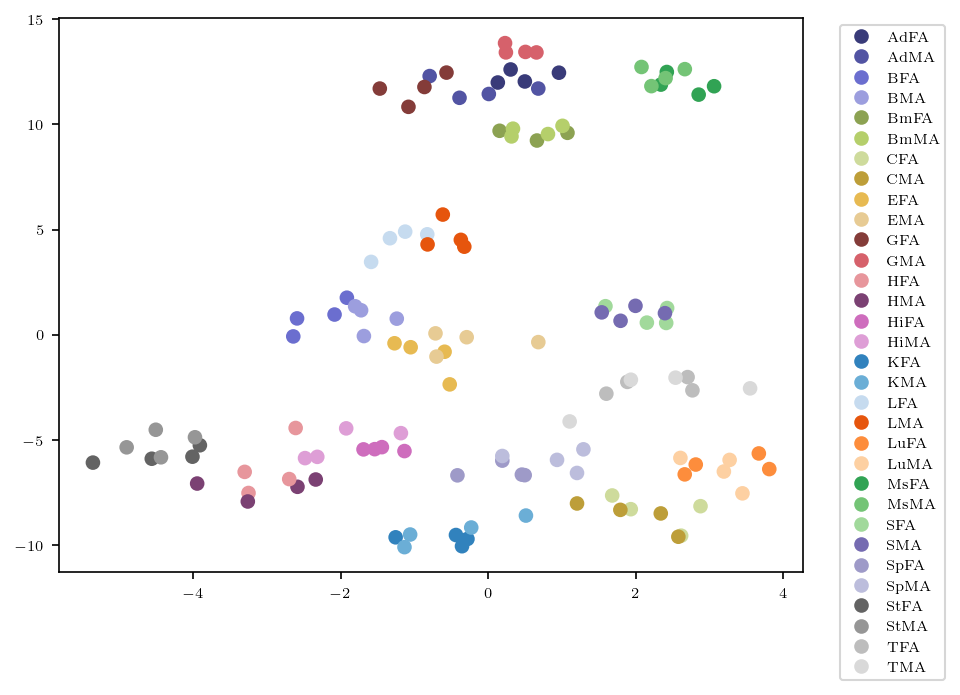

In [8]:
f = plt.figure()
scatter = plt.scatter(*Y_star.T, c = cs, cmap = cmap)
plt.legend(handles=scatter.legend_elements(num=len(labels_set))[0], labels=labels_set, bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.legend(handles=scatter.legend_elements()[0], labels=labels)
#plt.legend(labels)

In [9]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, perplexity=30.0)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))

<Axes: >

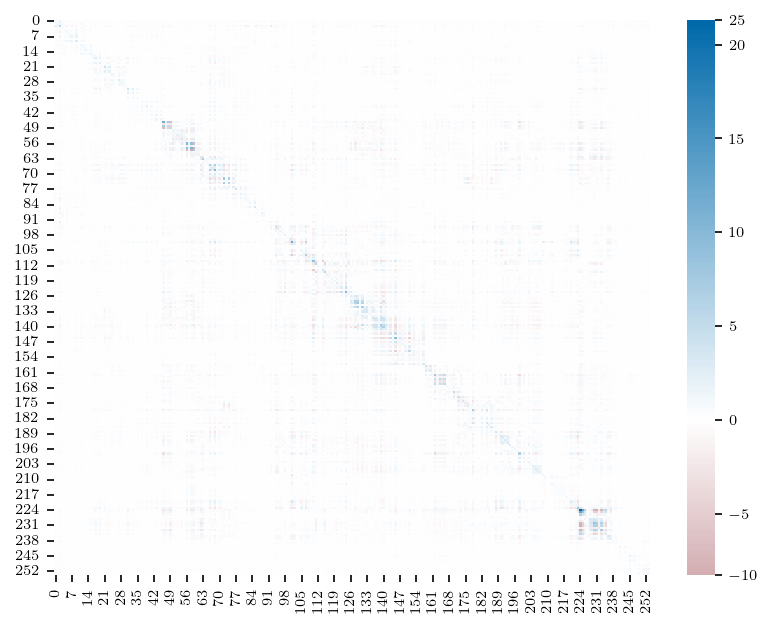

In [10]:
plot_heatmap(cov_final)

In [11]:
from utils import equipotential_standard_normal_within_one_std

S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)

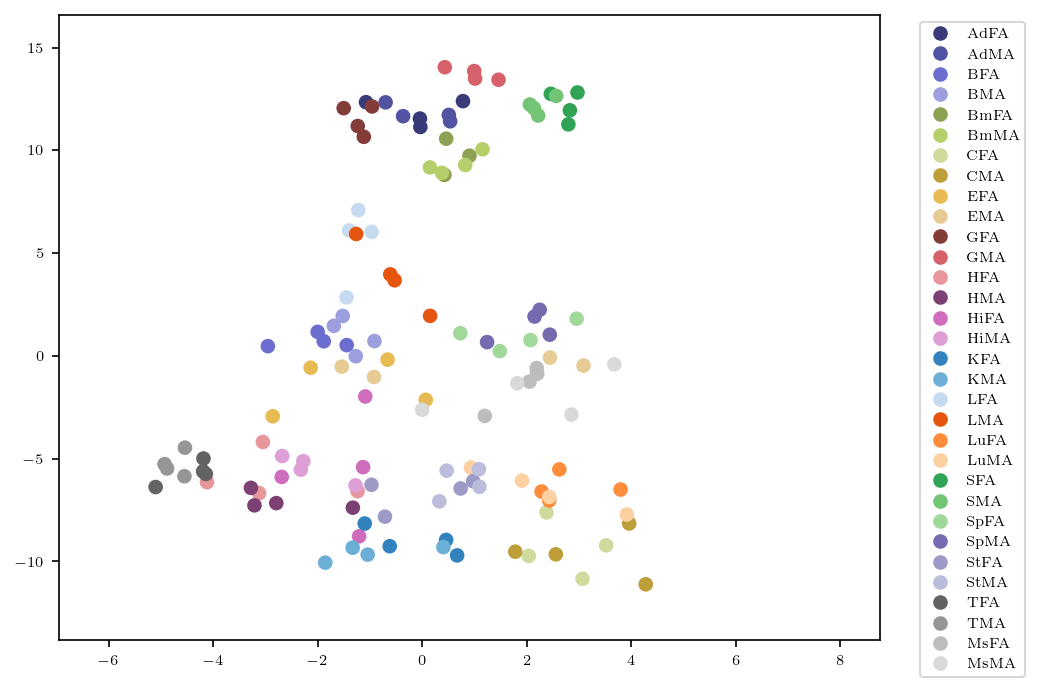

In [12]:
from animate_ifd import *
animate(samples, labels_red, 'datasets/AGEMAP/animation.gif', cmap)

(100, 254)


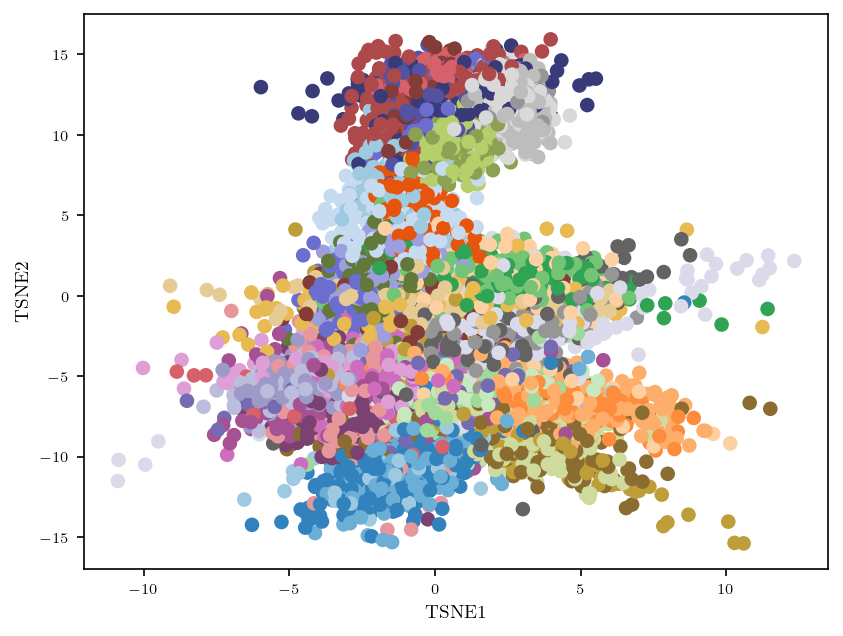

In [13]:
draw_and_plot_samples(Y_flat, Y_unflattener, cov_final, 100, 'datasets/AGEMAP/tnse_distr.pdf', cmap)